In [59]:
import seaborn as sns
import numpy as np

In [23]:
df=sns.load_dataset('iris')

In [24]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encoder  = LabelEncoder()

In [29]:
df.species = encoder.fit_transform(df['species'])

In [30]:
df.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,species
31,5.4,3.4,1.5,0.4,0
49,5.0,3.3,1.4,0.2,0


In [31]:
df = df.iloc[:,1:]

In [32]:
df.head(2)

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0


In [21]:
df.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [33]:
df.species.unique()

array([0, 1, 2], dtype=int64)

In [34]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [35]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

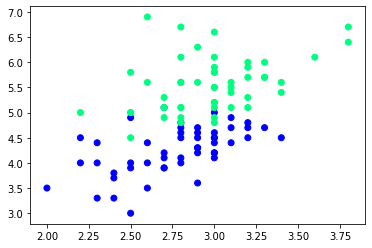

In [37]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [38]:
df.shape

(100, 3)

In [39]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
55,2.8,4.5,1
81,2.4,3.7,1
78,2.9,4.5,1
50,3.2,4.7,1
87,2.3,4.4,1
61,3.0,4.2,1
62,2.2,4.0,1
109,3.6,6.1,2
107,2.9,6.3,2
63,2.9,4.7,1


In [40]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [41]:
df_train

,sepal_width,petal_length,species
120,3.2,5.7,2
86,3.1,4.7,1
137,3.1,5.5,2
65,3.1,4.4,1
51,3.2,4.5,1
146,2.5,5.0,2
105,3.0,6.6,2
107,2.9,6.3,2
141,3.1,5.1,2
67,2.7,4.1,1


In [42]:
df_val

,sepal_width,petal_length,species
132,2.8,5.6,2
117,3.8,6.7,2
143,3.2,5.9,2
100,3.3,6.0,2
97,2.9,4.3,1


In [43]:
df_test

,sepal_width,petal_length,species
60,2.0,3.5,1
91,3.0,4.6,1
89,2.5,4.0,1
134,2.6,5.6,2
101,2.7,5.1,2


In [44]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [45]:
y_test

array([2, 2, 2, 2, 1])

# Case 1 - Bagging

In [48]:
!pip install mlxtend

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [ ]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

In [50]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
86,3.1,4.7,1
86,3.1,4.7,1
86,3.1,4.7,1
105,3.0,6.6,2
67,2.7,4.1,1
86,3.1,4.7,1
65,3.1,4.4,1
107,2.9,6.3,2


In [51]:
dt_bag1 = DecisionTreeClassifier()

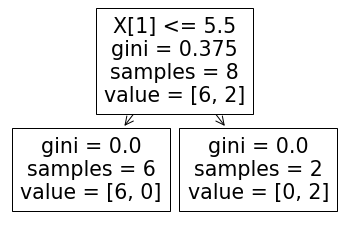

C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1.0


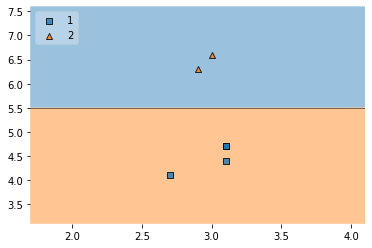

In [53]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
65,3.1,4.4,1
137,3.1,5.5,2
141,3.1,5.1,2
105,3.0,6.6,2
107,2.9,6.3,2
105,3.0,6.6,2
146,2.5,5.0,2
120,3.2,5.7,2


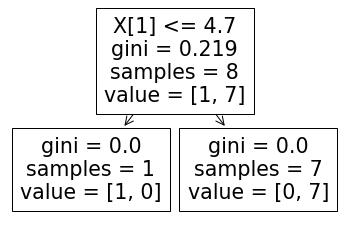

1.0


C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


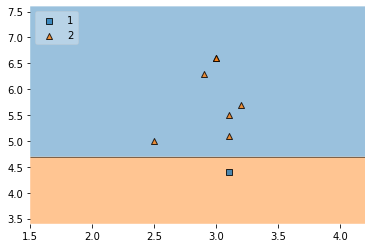

In [54]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [55]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
107,2.9,6.3,2
141,3.1,5.1,2
86,3.1,4.7,1
141,3.1,5.1,2
105,3.0,6.6,2
65,3.1,4.4,1
137,3.1,5.5,2
51,3.2,4.5,1


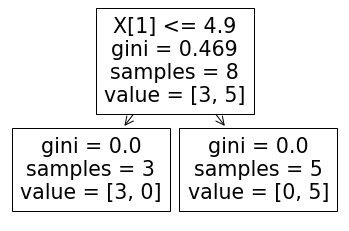

1.0


C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


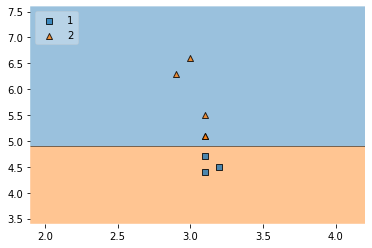

In [56]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [57]:
df_test

,sepal_width,petal_length,species
60,2.0,3.5,1
91,3.0,4.6,1
89,2.5,4.0,1
134,2.6,5.6,2
101,2.7,5.1,2


In [61]:
print("Predictor 1",dt_bag1.predict(np.array([2.5,4.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.5,4.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.5,4.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\abc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Pasting

In [62]:
# Method 1
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
120,3.2,5.7,2
86,3.1,4.7,1
137,3.1,5.5,2
65,3.1,4.4,1
51,3.2,4.5,1
146,2.5,5.0,2
105,3.0,6.6,2
107,2.9,6.3,2
141,3.1,5.1,2
67,2.7,4.1,1


In [63]:
df_train.sample(8)

,sepal_width,petal_length,species
86,3.1,4.7,1
107,2.9,6.3,2
137,3.1,5.5,2
120,3.2,5.7,2
146,2.5,5.0,2
141,3.1,5.1,2
67,2.7,4.1,1
105,3.0,6.6,2


# Random Subspaces

In [67]:
df1 = sns.load_dataset('iris')
df1 = df1.sample(10)

In [68]:
df

,sepal_width,petal_length,species
105,3.0,6.6,2
140,3.1,5.6,2
147,3.0,5.2,2
120,3.2,5.7,2
87,2.3,4.4,1
...,...,...,...
136,3.4,5.6,2
128,2.8,5.6,2
110,3.2,5.1,2
135,3.0,6.1,2


In [69]:
df1.sample(2,replace=True,axis=1)

,species,sepal_length
25,setosa,5.0
37,setosa,4.9
41,setosa,4.5
129,virginica,7.2
147,virginica,6.5
122,virginica,7.7
7,setosa,5.0
106,virginica,4.9
76,versicolor,6.8
121,virginica,5.6


# Random Patches
- column sampling

In [70]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
25,5.0,3.0,1.6,0.2,setosa
37,4.9,3.6,1.4,0.1,setosa
41,4.5,2.3,1.3,0.3,setosa
129,7.2,3.0,5.8,1.6,virginica
147,6.5,3.0,5.2,2.0,virginica
122,7.7,2.8,6.7,2.0,virginica
7,5.0,3.4,1.5,0.2,setosa
106,4.9,2.5,4.5,1.7,virginica
76,6.8,2.8,4.8,1.4,versicolor
121,5.6,2.8,4.9,2.0,virginica


In [71]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal_length,sepal_width
76,4.8,2.8
106,4.5,2.5
41,1.3,2.3
147,5.2,3.0
129,5.8,3.0
106,4.5,2.5
122,6.7,2.8
121,4.9,2.8
